In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [0]:
qs = pd.read_excel('Questions.xlsx')
re = pd.read_excel('Responses.xlsx')

In [0]:
qs.head(2)

,Q#,Question,Category
0,Question 01,Managing territories based on business potenti...,Leading Strategically
1,Question 02,Implementing business objectives and plans tha...,Leading Strategically


In [0]:
re.head(2)

,Emp Name,Assessed By,Reviewer Name,Question No,Importance of Skill to Organization,Score given to Employee
0,B Meston,Reviewer,Darren Powers,Question 01,4,1
1,B Meston,Reviewer,Darren Powers,Question 02,1,5


In [0]:
mark0 =  pd.merge(left=qs ,right=re, left_on='Q#', right_on='Question No')

In [0]:
mark0.head(5)

,Q#,Question,Category,Emp Name,Assessed By,Reviewer Name,Question No,Importance of Skill to Organization,Score given to Employee
0,Question 01,Managing territories based on business potenti...,Leading Strategically,B Meston,Reviewer,Darren Powers,Question 01,4,1
1,Question 01,Managing territories based on business potenti...,Leading Strategically,B Meston,Reviewer,Phillina Ober,Question 01,5,5
2,Question 01,Managing territories based on business potenti...,Leading Strategically,B Meston,Reviewer,Mick Brown,Question 01,5,5
3,Question 01,Managing territories based on business potenti...,Leading Strategically,B Meston,Reviewer,Lycoris Saunders,Question 01,3,3
4,Question 01,Managing territories based on business potenti...,Leading Strategically,B Meston,Self,Self,Question 01,4,4


In [0]:
mark0.drop(['Q#'],inplace=True,axis=1)

In [0]:
mark0.to_excel('employee_data.xlsx')

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

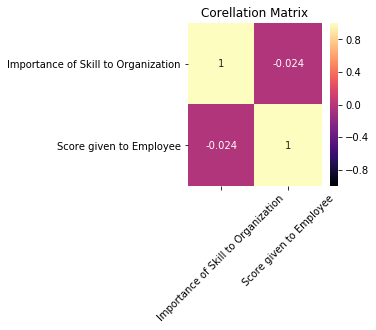

In [0]:
plt.figure(figsize=(3,3))
plt.title('Corellation Matrix')
sns.heatmap(mark0.corr(),vmin=-1,vmax=+1,cmap='magma',annot=True)
plt.xticks(rotation=45)

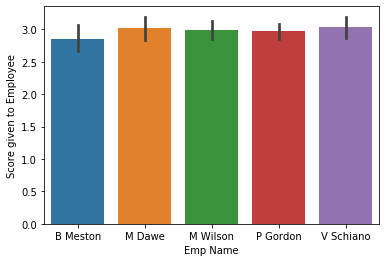

In [0]:
sns.barplot(x='Emp Name', y='Score given to Employee', data=mark0)

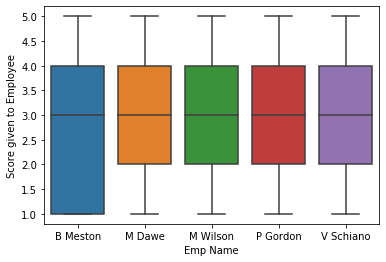

In [0]:
sns.boxplot(x='Emp Name', y='Score given to Employee', data=mark0)

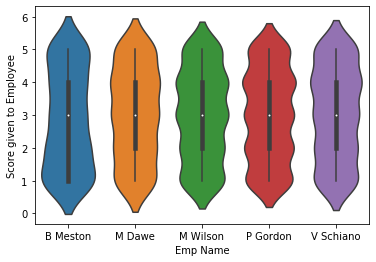

In [0]:
sns.violinplot(x='Emp Name', y='Score given to Employee', data=mark0)

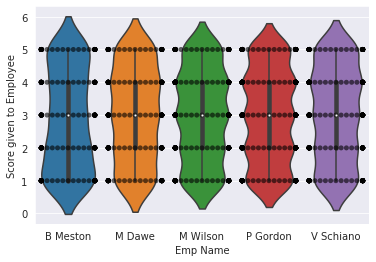

In [0]:
sns.swarmplot(x='Emp Name', y='Score given to Employee', data=mark0,color = 'k', alpha = 0.6)
sns.violinplot(x='Emp Name', y='Score given to Employee', data=mark0)

In [0]:
sns.set_style('darkgrid')

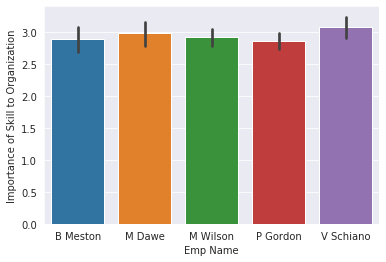

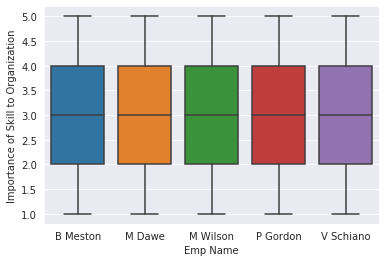

In [0]:
sns.barplot(x='Emp Name', y='Importance of Skill to Organization', data=mark0)
plt.show()
print('\n')
sns.boxplot(x='Emp Name', y='Importance of Skill to Organization', data=mark0)
plt.show()

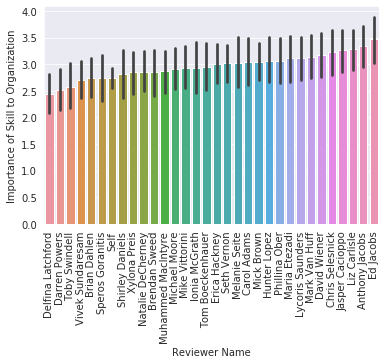

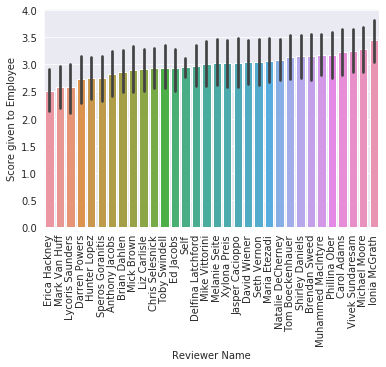

In [0]:
result = mark0.groupby(['Reviewer Name'])['Importance of Skill to Organization'].aggregate(np.mean).reset_index().sort_values('Importance of Skill to Organization')
sns.barplot(x='Reviewer Name', y='Importance of Skill to Organization', data=mark0, order=result['Reviewer Name'])
plt.xticks(rotation=90)
plt.show()
print('\n')
result_1 = mark0.groupby(['Reviewer Name'])['Score given to Employee'].aggregate(np.mean).reset_index().sort_values('Score given to Employee')
sns.barplot(x='Reviewer Name', y='Score given to Employee', data=mark0, order=result_1['Reviewer Name'])
plt.xticks(rotation=90)
plt.show()

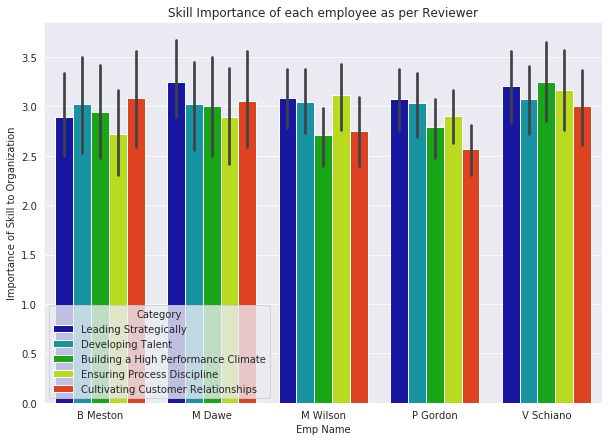

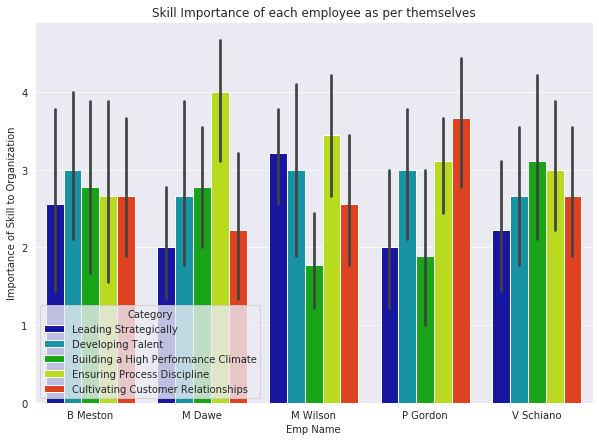

In [0]:
plt.figure(figsize=(10,7))
sns.barplot(x='Emp Name', y='Importance of Skill to Organization',hue='Category', data=mark0[mark0['Assessed By']=='Reviewer'], palette='nipy_spectral')
plt.title('Skill Importance of each employee as per Reviewer')
plt.show()
print('\n')
plt.figure(figsize=(10,7))
sns.barplot(x='Emp Name', y='Importance of Skill to Organization',hue='Category', data=mark0[mark0['Assessed By']=='Self'], palette='nipy_spectral')
plt.title('Skill Importance of each employee as per themselves')
plt.show()

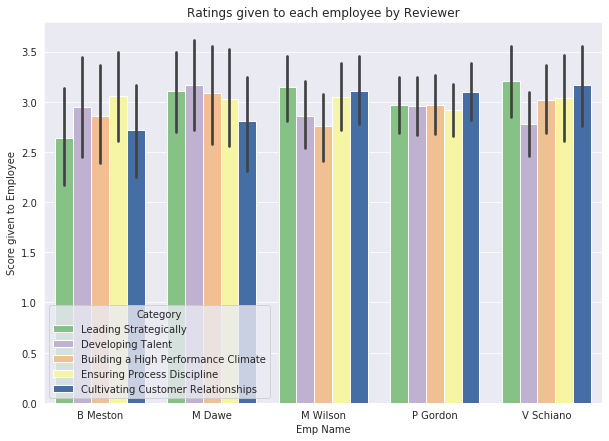

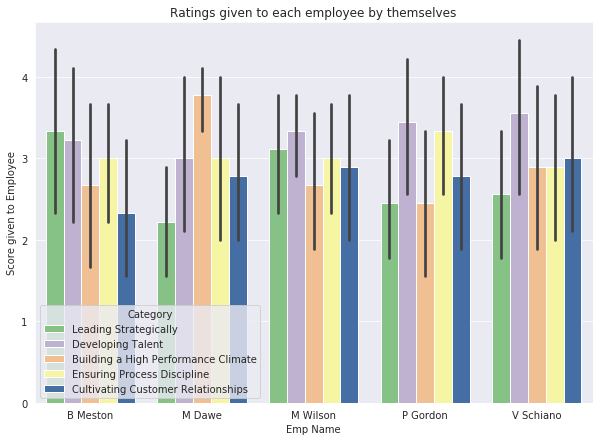

In [0]:
plt.figure(figsize=(10,7))
sns.barplot(x='Emp Name', y='Score given to Employee',hue='Category', data=mark0[mark0['Assessed By']=='Reviewer'], palette='Accent', saturation=0.8)
plt.title('Ratings given to each employee by Reviewer')
plt.show()
print('\n')
plt.figure(figsize=(10,7))
sns.barplot(x='Emp Name', y='Score given to Employee', hue='Category', data=mark0[mark0['Assessed By']=='Self'], palette='Accent', saturation=0.8)
plt.title('Ratings given to each employee by themselves')
plt.show()

Diff. between Imp. for a Skill and Score in that Skill for each Employee, #DONT USE THIS

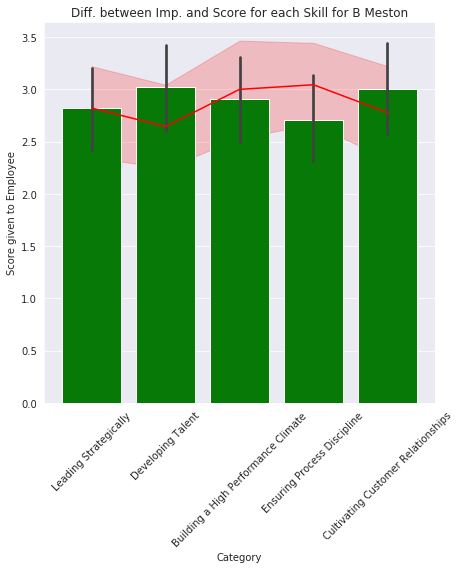

In [0]:
plt.figure(figsize=(7,7))
sns.barplot(x='Category', y='Importance of Skill to Organization', data=mark0[mark0['Emp Name']=='B Meston'], color='g', saturation=0.9,)
sns.lineplot(x='Category', y='Score given to Employee', data=mark0[mark0['Emp Name']=='B Meston'], color='r',markers='*')
plt.title('Diff. between Imp. and Score for each Skill for B Meston')
plt.xticks(rotation=45)
plt.show()

Diff. between reviewer and self assessed for Importance and Score for each category

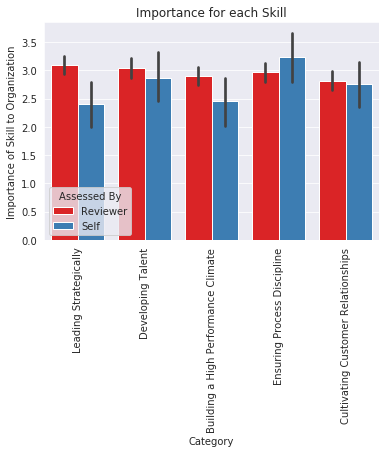

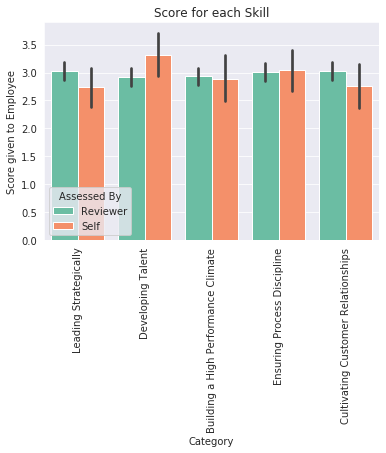

In [0]:
sns.barplot(x='Category', y='Importance of Skill to Organization',hue='Assessed By', data=mark0, palette='Set1', saturation=0.9)
plt.title('Importance for each Skill')
plt.xticks(rotation=90)
plt.show()
print('\n')
sns.barplot(x='Category', y='Score given to Employee', data=mark0,hue='Assessed By', palette='Set2', saturation=0.9,)
plt.title('Score for each Skill')
plt.xticks(rotation=90)
plt.show()

Difference for Score and Importance between reviewer and self for each question

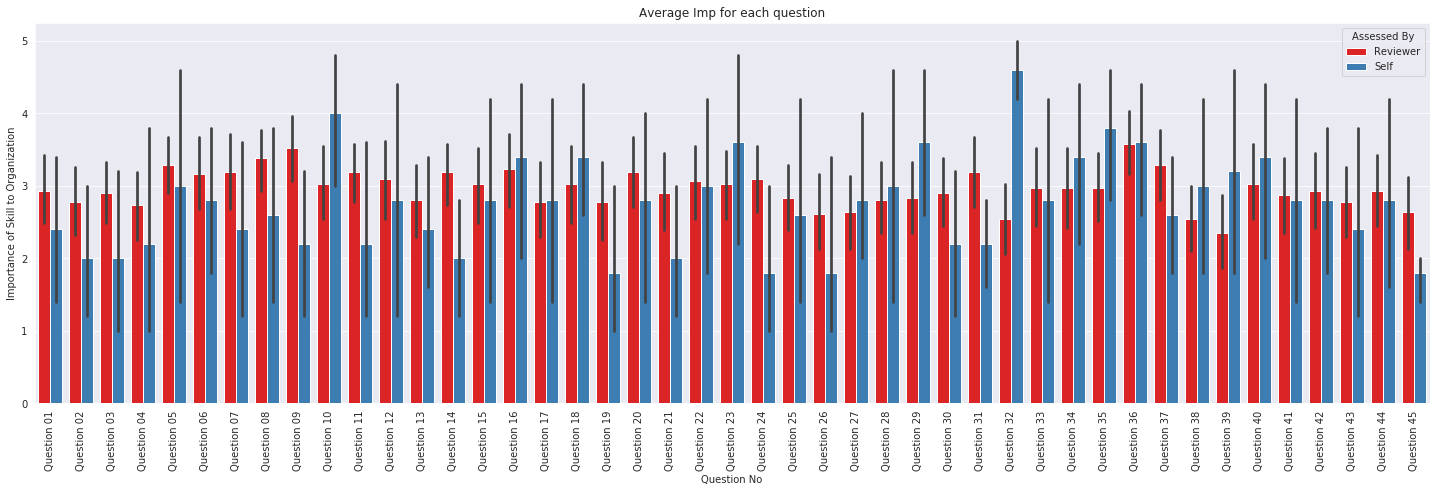

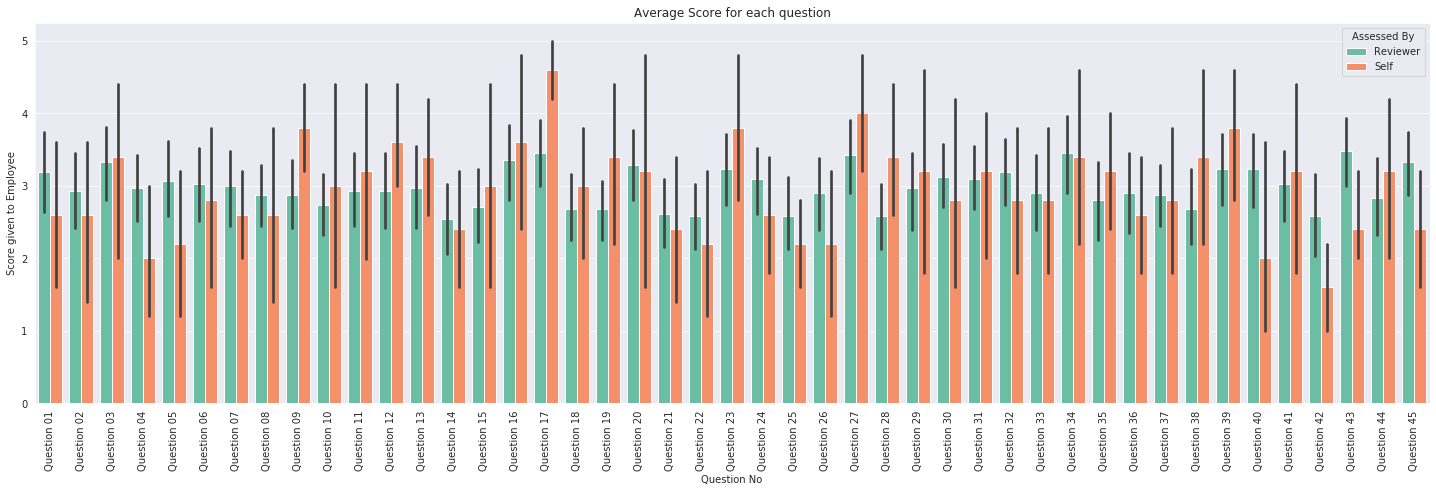

In [0]:
plt.figure(figsize=(25,7))
sns.barplot(x='Question No', y='Importance of Skill to Organization',hue='Assessed By', data=mark0, palette='Set1', saturation=0.9, )
plt.title('Average Imp for each question')
plt.xticks(rotation=90)
plt.show()
print('\n')
plt.figure(figsize=(25,7))
sns.barplot(x='Question No', y='Score given to Employee', data=mark0,hue='Assessed By', palette='Set2', saturation=0.9,)
plt.title('Average Score for each question')
plt.xticks(rotation=90)
plt.show()

Histogram of Scores given

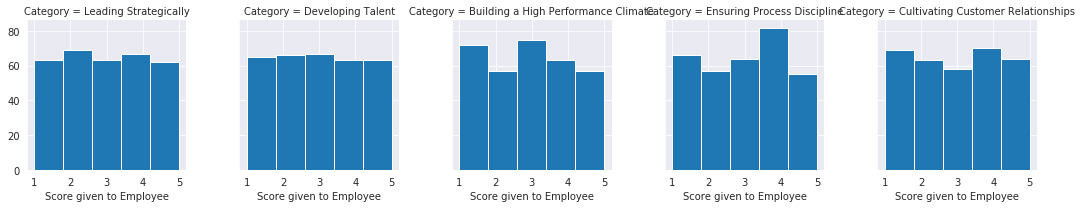

In [0]:
g = sns.FacetGrid(data=mark0,col='Category')
g.map(plt.hist,'Score given to Employee',bins=5)
plt.show()


Histogram of Skill Importance

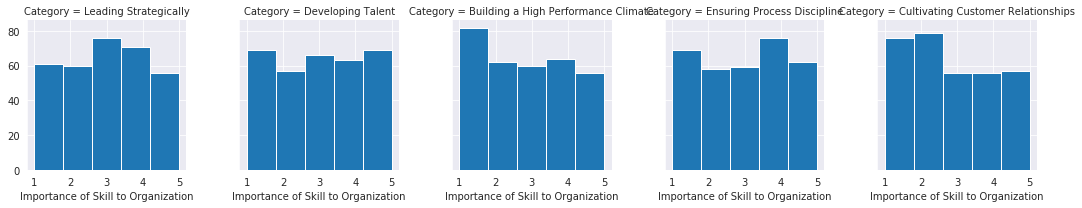

In [0]:
g = sns.FacetGrid(data=mark0,col='Category')
g.map(plt.hist,'Importance of Skill to Organization',bins=5)

(array([357., 316., 317., 330., 300.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

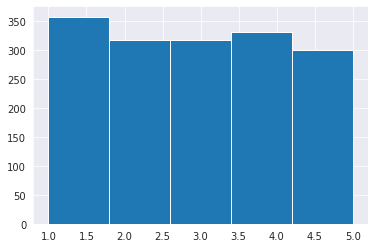

In [0]:
plt.hist(x='Importance of Skill to Organization',data=mark0, bins=5)

Taking only reviewd by reviewer data

In [5]:
mark7 = mark0[mark0['Assessed By']=='Reviewer']
mark7.head(3)

,Question,Category,Emp Name,Assessed By,Reviewer Name,Question No,Importance of Skill to Organization,Score given to Employee
0,Managing territories based on business potenti...,Leading Strategically,B Meston,Reviewer,Darren Powers,Question 01,4,1
1,Managing territories based on business potenti...,Leading Strategically,B Meston,Reviewer,Phillina Ober,Question 01,5,5
2,Managing territories based on business potenti...,Leading Strategically,B Meston,Reviewer,Mick Brown,Question 01,5,5


Average score for each Category and for each Employee for employee segregation

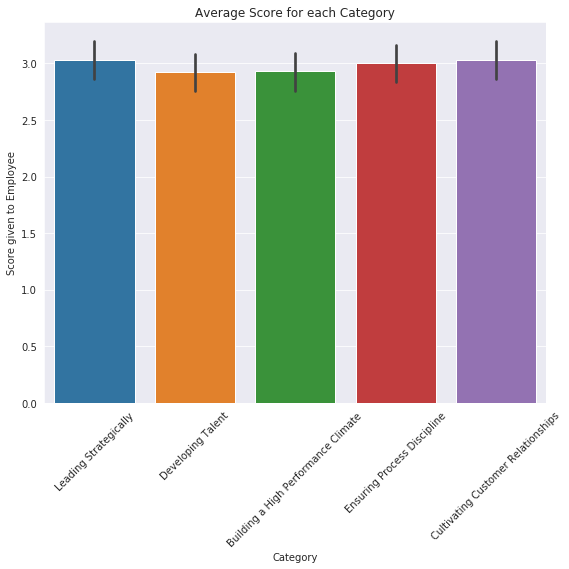

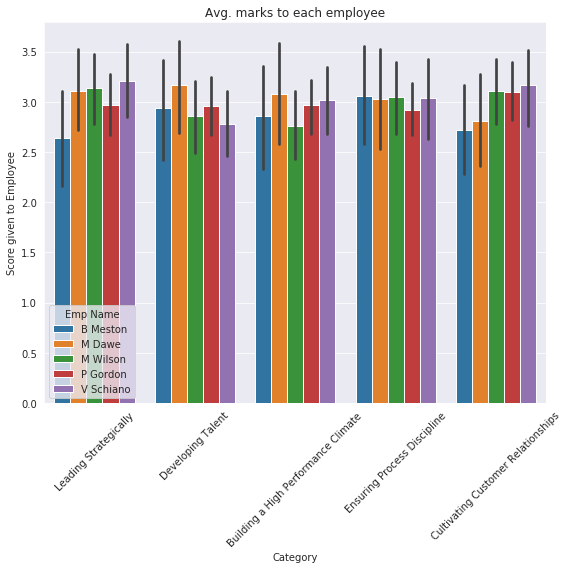

In [0]:
plt.figure(figsize=(9,7))
sns.barplot(x='Category', y='Score given to Employee', data=mark7)
plt.title('Average Score for each Category')
plt.xticks(rotation=45)
plt.show()
print('\n')
plt.figure(figsize=(9,7))
sns.barplot(x='Category', y='Score given to Employee',hue='Emp Name', data=mark7)
plt.title('Avg. marks to each employee')
plt.xticks(rotation=45)
plt.show()

Added new data set containing product of Importance for that skill and Score

In [0]:
mark42 = pd.read_excel('employee.xlsx')

In [0]:
mark42.head(2)

,Q#,Question,Category,Emp Name,Assessed By,Reviewer Name,Question No,Importance of Skill to Organization,Score given to Employee,Score_Prod
0,Question 01,Managing territories based on business potenti...,Leading Strategically,B Meston,Reviewer,Darren Powers,Question 01,4,1,4
1,Question 01,Managing territories based on business potenti...,Leading Strategically,B Meston,Reviewer,Phillina Ober,Question 01,5,5,25


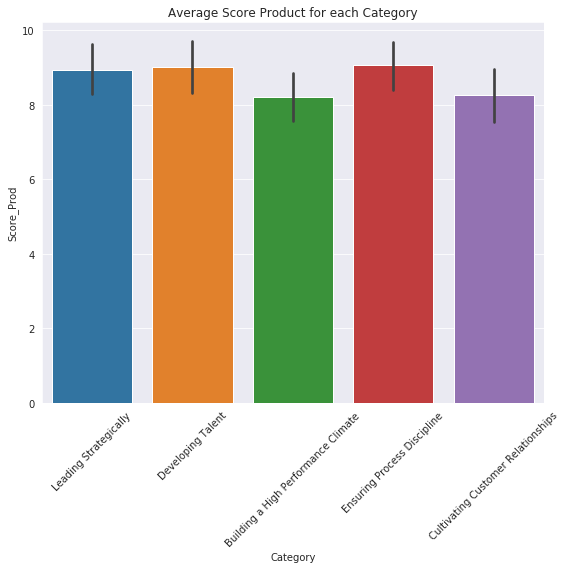

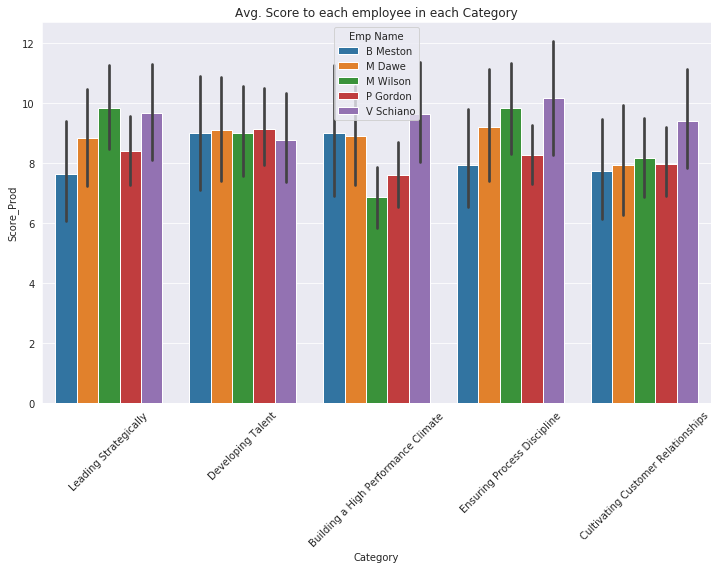

In [0]:
plt.figure(figsize=(9,7))
sns.barplot(x='Category', y='Score_Prod', data=mark42)
plt.title('Average Score Product for each Category')
plt.xticks(rotation=45)
plt.show()
print('\n')
plt.figure(figsize=(12,7))
sns.barplot(x='Category', y='Score_Prod',hue='Emp Name', data=mark42)
plt.title('Avg. Score to each employee in each Category')
plt.xticks(rotation=45)
plt.show()

Diff. between Importance and Score for each Question for all employees USE THIS

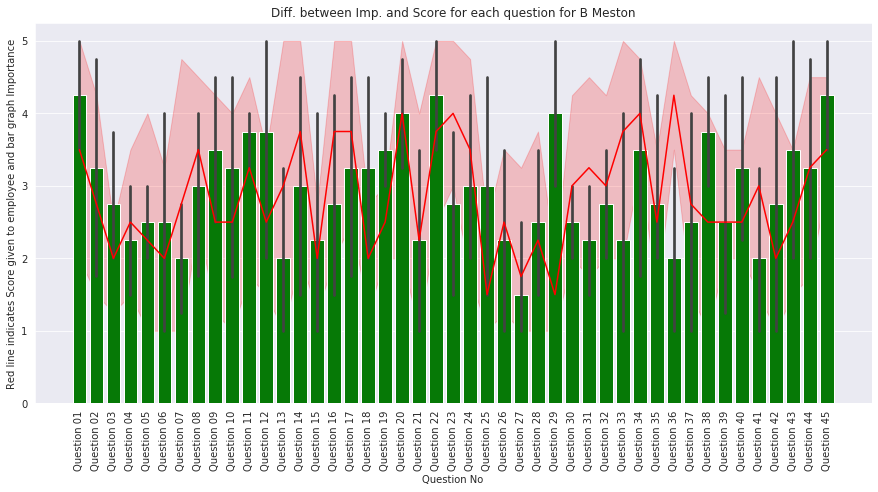

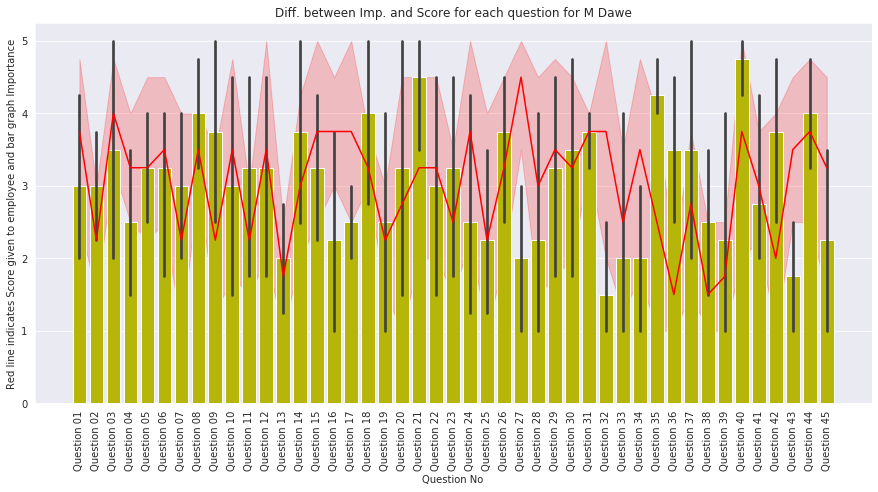

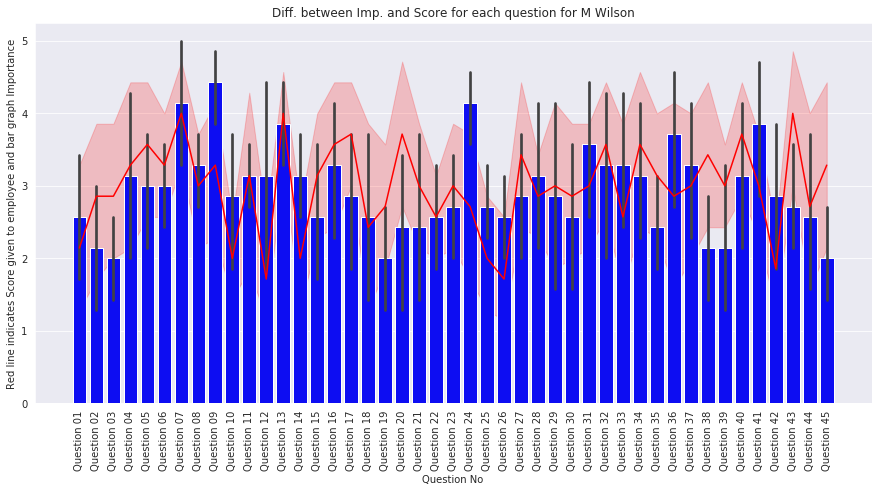

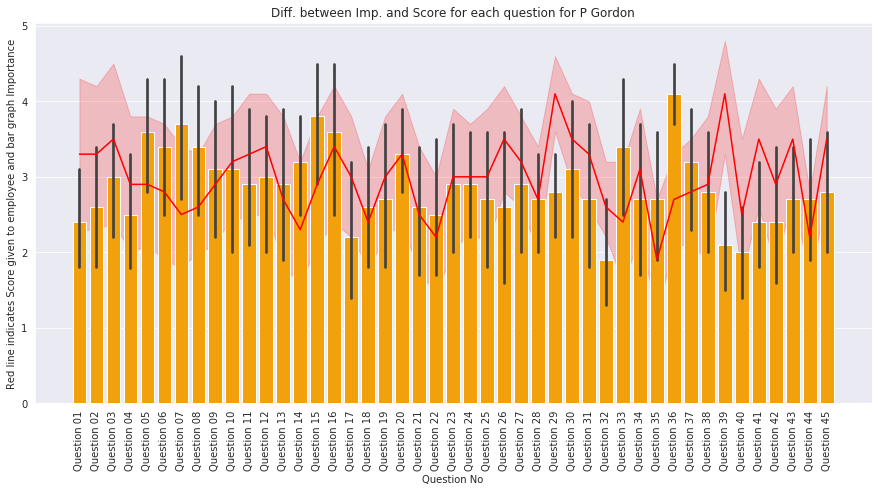

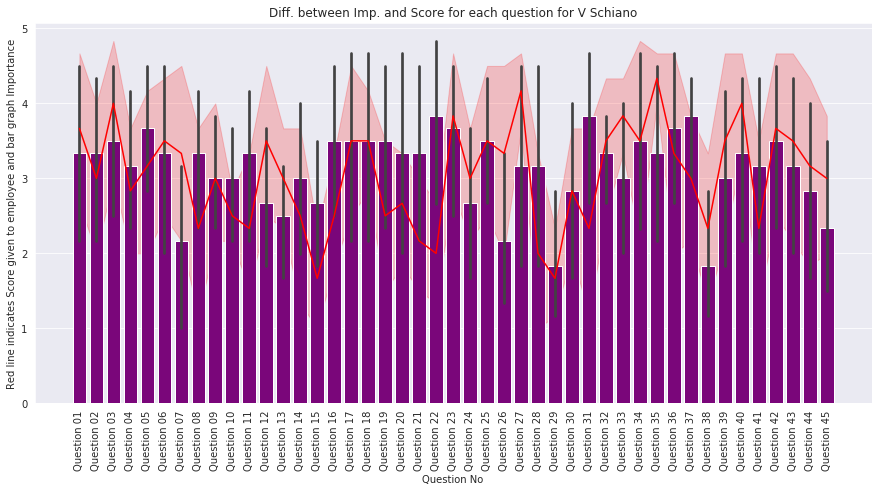

In [0]:
plt.figure(figsize=(15,7))
sns.barplot(x='Question No', y='Importance of Skill to Organization', data=mark7[mark7['Emp Name']=='B Meston'], color='g', saturation=0.9,)
sns.lineplot(x='Question No', y='Score given to Employee', data=mark7[mark7['Emp Name']=='B Meston'], color='r',markers=True)
plt.title('Diff. between Imp. and Score for each question for B Meston')
plt.ylabel('Red line indicates Score given to employee and bar graph Importance')
plt.xticks(rotation=90)
plt.show()
print('\n')
plt.figure(figsize=(15,7))
sns.barplot(x='Question No', y='Importance of Skill to Organization', data=mark7[mark7['Emp Name']=='M Dawe'], color='y', saturation=0.9,)
sns.lineplot(x='Question No', y='Score given to Employee', data=mark7[mark7['Emp Name']=='M Dawe'], color='r')
plt.title('Diff. between Imp. and Score for each question for M Dawe')
plt.ylabel('Red line indicates Score given to employee and bar graph Importance')
plt.xticks(rotation=90)
plt.show()
print('\n')
plt.figure(figsize=(15,7))
sns.barplot(x='Question No', y='Importance of Skill to Organization', data=mark7[mark7['Emp Name']=='M Wilson'], color='b', saturation=0.9,)
sns.lineplot(x='Question No', y='Score given to Employee', data=mark7[mark7['Emp Name']=='M Wilson'], color='r')
plt.title('Diff. between Imp. and Score for each question for M Wilson')
plt.ylabel('Red line indicates Score given to employee and bar graph Importance')
plt.xticks(rotation=90)
plt.show()
print('\n')
plt.figure(figsize=(15,7))
sns.barplot(x='Question No', y='Importance of Skill to Organization', data=mark7[mark7['Emp Name']=='P Gordon'], color='orange', saturation=0.9,)
sns.lineplot(x='Question No', y='Score given to Employee', data=mark7[mark7['Emp Name']=='P Gordon'], color='r')
plt.title('Diff. between Imp. and Score for each question for P Gordon')
plt.ylabel('Red line indicates Score given to employee and bar graph Importance')
plt.xticks(rotation=90)
plt.show()
print('\n')
plt.figure(figsize=(15,7))
sns.barplot(x='Question No', y='Importance of Skill to Organization', data=mark7[mark7['Emp Name']=='V Schiano'], color='purple', saturation=0.9,)
sns.lineplot(x='Question No', y='Score given to Employee', data=mark7[mark7['Emp Name']=='V Schiano'], color='r')
plt.title('Diff. between Imp. and Score for each question for V Schiano')
plt.ylabel('Red line indicates Score given to employee and bar graph Importance')
plt.xticks(rotation=90)
plt.show()